In [1]:
import sys
import os

import matplotlib.pyplot as plt

sys.path.insert(0, os.path.join(os.path.dirname(os.path.abspath('')), '..', '..'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
pd.options.mode.chained_assignment = None

In [2]:
def get_cleaned_dataframe(csv_file_path, is_cifar10, rows_to_keep=None):
    # read the csv file
    df = pd.read_csv(csv_file_path)
    # get only the relevant columns
    df = df[['Unnamed: 0', 'Entropy Attack FPR', 'Threshold Attack FPR', 'Salem Attack FPR']]
    # rename the columns
    df.rename(columns={'Unnamed: 0': 'Dataset','Threshold Attack FPR': 'Max. Confidence', 'Salem Attack FPR': 'Top-3 Confidences', 'Entropy Attack FPR': 'Entropy'}, inplace=True)

    if is_cifar10:
        df['Dataset'] = df['Dataset'].str.replace('CIFAR100', 'CIFAR-100').str.replace('Original', 'CIFAR-10')
    else:
        df['Dataset'] = df['Dataset'].str.replace('Original', 'Stanford Dogs').str.replace('-', ' ')

    df.index = df['Dataset'].values.tolist()

    if rows_to_keep is not None:
        df = df[df['Dataset'].isin(rows_to_keep)]
        df = df.reindex(rows_to_keep)

    return df


def plot_dataframes(
        df1,
        df2,
        alpha=0.5,
        figsize=(7, 5.7),
        show_legend=True,
        legend_loc='upper left',
        legend_frame=False,
        show_y_label=False,
        show_y_axis=False,
        show_x_axis=False
):
    if not show_x_axis:
        figsize = (figsize[0], figsize[1]*0.66)
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.barplot(
        x=df1['Dataset'],
        y=df1['FPR'],
        hue=df1['Attack'],
        alpha=alpha,
        palette=sns.color_palette("tab10")
    )
    ax = sns.barplot(
        x=df2['Dataset'],
        y=df2['FPR'],
        hue=df2['Attack'],
        alpha=1,
        palette=sns.color_palette("tab10")
    )
    ax.tick_params(axis='x', labelrotation=60, labelsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), ha='right')
    ax.tick_params(axis='y', labelsize=20)

    if not show_y_label:
        ax.set(ylabel=None)

    ax.xaxis.label.set_size(25)
    ax.yaxis.label.set_size(25)
    ax.xaxis.label.set_weight('bold')
    ax.yaxis.label.set_weight('bold')

    if not show_x_axis:
        for tick in ax.xaxis.get_major_ticks():
            tick.tick1line.set_visible(False)
            tick.tick2line.set_visible(False)
            tick.label1.set_visible(False)
            tick.label2.set_visible(False)

    for tick_label in ax.get_xticklabels():
        tick_label.set_fontweight('bold')
    for tick_label in ax.get_yticklabels():
        tick_label.set_fontweight('bold')

    ax.set_ylim([0, 1])
    ax.yaxis.set_ticks(np.arange(0, 1.1, 0.2))
    ax.grid(True)

    if not show_y_axis:
        for tick in ax.yaxis.get_major_ticks():
            tick.tick1line.set_visible(False)
            tick.tick2line.set_visible(False)
            tick.label1.set_visible(False)
            tick.label2.set_visible(False)


    if not show_legend:
        ax.legend([], [], frameon=False)
    else:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles=handles[-3:], labels=labels[-3:], loc=legend_loc, prop={'weight':'bold', 'size':21}, frameon=True, labelspacing=0.2, borderpad=0.2, borderaxespad=0.0, framealpha=1, handletextpad=0.2)

    # remove the unnecessary x label
    plt.xlabel("")

    plt.subplots_adjust(bottom=0.35)
    plt.tight_layout()
    if not show_x_axis:
        plt.subplots_adjust(bottom=0.05)
    return ax, ax.get_figure()

In [3]:
rows_to_keep_cifar = ['CIFAR-10', 'Fake CIFAR-10', 'AFHQ Cats', 'STL-10', 'CIFAR-100', 'SVHN', 'Permuted', 'Scaled']
rows_to_keep_dogs = ['Stanford Dogs', 'Fake Dogs', 'AFHQ Dogs', 'AFHQ Cats', 'Permuted', 'Scaled']

# Salem CNN Relu

LLLA


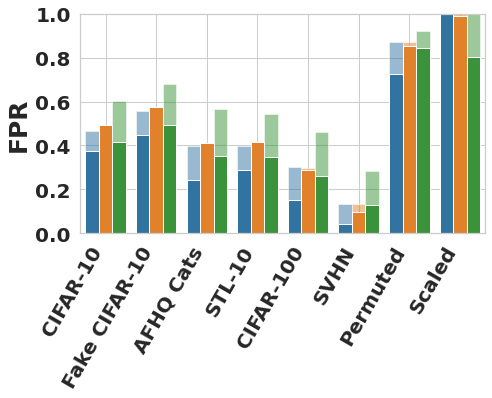

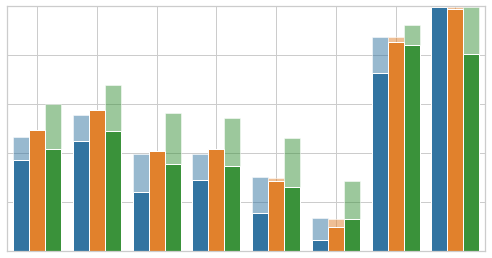

Label Smoothing


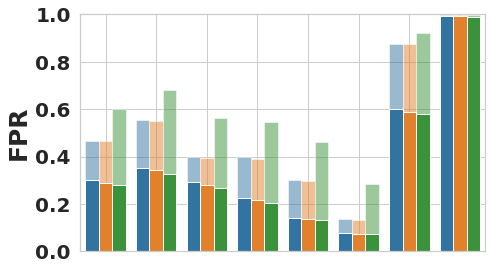

In [4]:
salem_cnn_relu_uncalibrated_df = get_cleaned_dataframe(
    '../results/salem_cnn_relu_cifar10_attack_results.csv',
    is_cifar10=True,
    rows_to_keep=rows_to_keep_cifar
)
salem_cnn_relu_uncalibrated_df = pd.melt(salem_cnn_relu_uncalibrated_df, id_vars=['Dataset'], var_name='Attack', value_name='FPR')

print("LLLA")
salem_cnn_llla_calibrated_df = get_cleaned_dataframe(
    '../results/salem_cnn_relu_cifar10_LLLA_attack_results.csv',
    is_cifar10=True,
    rows_to_keep=rows_to_keep_cifar
)
salem_cnn_llla_calibrated_df = pd.melt(salem_cnn_llla_calibrated_df, id_vars=['Dataset'], var_name='Attack', value_name='FPR')

ax, fig = plot_dataframes(salem_cnn_relu_uncalibrated_df, salem_cnn_llla_calibrated_df, show_y_label=True, show_x_axis=True, show_y_axis=True, show_legend=False)
fig = ax.get_figure()
plt.show()
fig.savefig('salem_cnn_relu_cifar10_LLLA_attack_results.pdf')

ax, fig = plot_dataframes(salem_cnn_relu_uncalibrated_df, salem_cnn_llla_calibrated_df, show_y_label=False, show_x_axis=False, show_y_axis=False, show_legend=False)
fig = ax.get_figure()
plt.show()
fig.savefig('salem_cnn_relu_cifar10_LLLA_attack_results_without_y_label_without_x_axis.pdf')

print("Label Smoothing")
salem_cnn_relu_llla_calibrated_df = get_cleaned_dataframe(
    '../results/salem_cnn_relu_cifar10_LS_0.0083_attack_results.csv',
    is_cifar10=True,
    rows_to_keep=rows_to_keep_cifar
)
salem_cnn_relu_llla_calibrated_df = pd.melt(salem_cnn_relu_llla_calibrated_df, id_vars=['Dataset'], var_name='Attack', value_name='FPR')

ax, fig = plot_dataframes(salem_cnn_relu_uncalibrated_df, salem_cnn_relu_llla_calibrated_df, show_y_label=True, show_x_axis=False, show_y_axis=True, show_legend=False)
fig = ax.get_figure()
plt.show()
fig.savefig('salem_cnn_relu_cifar10_LS_0.0083_attack_results.pdf')

# Efficient Net


LLLA


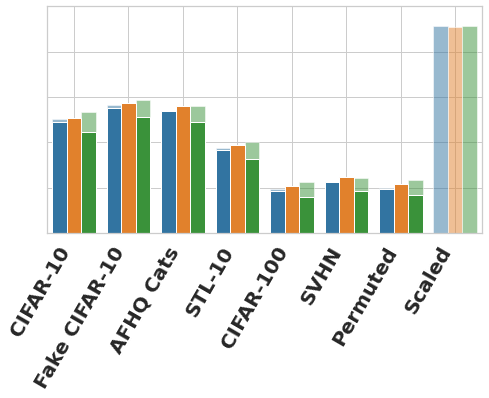

Label Smoothing


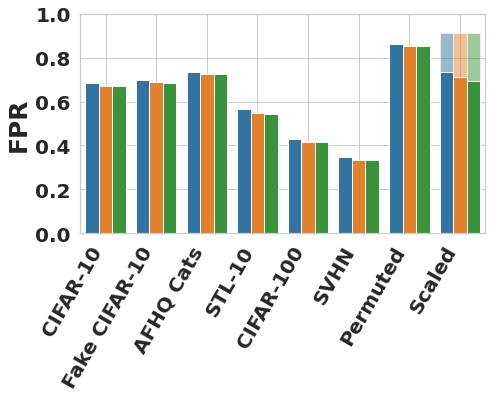

In [5]:
efficient_net_uncalibrated_df = get_cleaned_dataframe(
    '../results/efficient_net_cifar10_attack_results.csv',
    is_cifar10=True,
    rows_to_keep=rows_to_keep_cifar
)
efficient_net_uncalibrated_df = pd.melt(efficient_net_uncalibrated_df, id_vars=['Dataset'], var_name='Attack', value_name='FPR')

print("LLLA")
efficient_net_llla_calibrated_df = get_cleaned_dataframe(
    '../results/efficient_net_cifar10_LLLA_attack_results.csv',
    is_cifar10=True,
    rows_to_keep=rows_to_keep_cifar
)
efficient_net_llla_calibrated_df = pd.melt(efficient_net_llla_calibrated_df, id_vars=['Dataset'], var_name='Attack', value_name='FPR')

ax, fig = plot_dataframes(efficient_net_uncalibrated_df, efficient_net_llla_calibrated_df, show_y_label=False, show_x_axis=True, show_y_axis=False, show_legend=False)
fig = ax.get_figure()
plt.show()
fig.savefig('efficient_net_cifar10_LLLA_attack_results.pdf')

print("Label Smoothing")
efficient_net_ls_calibrated_df = get_cleaned_dataframe(
    '../results/efficient_net_cifar10_LS_0.0083_attack_results.csv',
    is_cifar10=True,
    rows_to_keep=rows_to_keep_cifar
)
efficient_net_ls_calibrated_df = pd.melt(efficient_net_ls_calibrated_df, id_vars=['Dataset'], var_name='Attack', value_name='FPR')

ax, fig = plot_dataframes(efficient_net_uncalibrated_df, efficient_net_ls_calibrated_df, show_legend=False, show_y_label=True, show_x_axis=True, show_y_axis=True)
fig = ax.get_figure()
plt.show()
fig.savefig('efficient_net_cifar10_LS_0.0083_attack_results.pdf')

# ResNet-18


LLLA


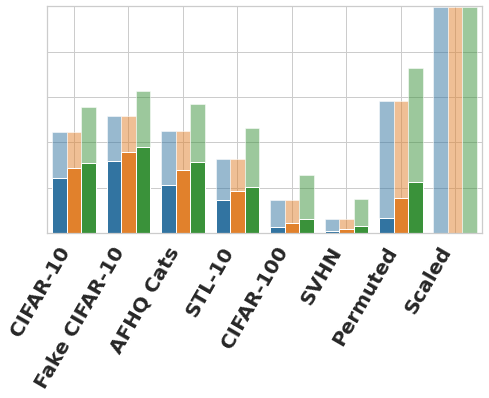

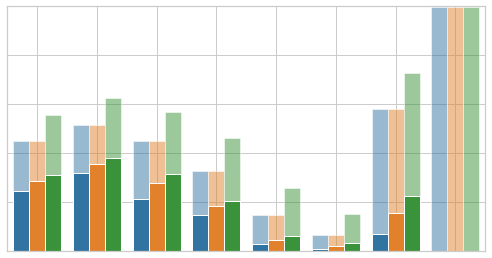

Label Smoothing


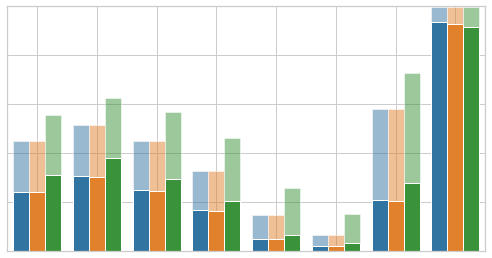

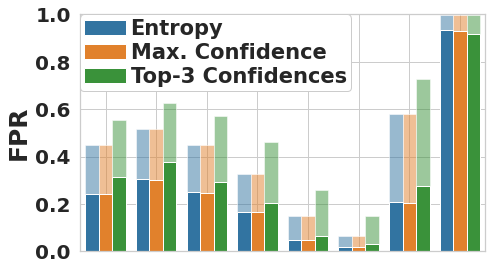

In [6]:
resnet18_uncalibrated_df = get_cleaned_dataframe(
    '../results/resnet18_cifar10_attack_results.csv',
    is_cifar10=True,
    rows_to_keep=rows_to_keep_cifar
)
resnet18_uncalibrated_df = pd.melt(resnet18_uncalibrated_df, id_vars=['Dataset'], var_name='Attack', value_name='FPR')

print("LLLA")
resnet18_llla_calibrated_df = get_cleaned_dataframe(
    '../results/resnet18_cifar10_LLLA_attack_results.csv',
    is_cifar10=True,
    rows_to_keep=rows_to_keep_cifar
)
resnet18_llla_calibrated_df = pd.melt(resnet18_llla_calibrated_df, id_vars=['Dataset'], var_name='Attack', value_name='FPR')

ax, fig = plot_dataframes(resnet18_uncalibrated_df, resnet18_llla_calibrated_df, show_y_label=False, show_x_axis=True, show_y_axis=False, show_legend=False)
fig = ax.get_figure()
plt.show()
fig.savefig('resnet18_cifar10_LLLA_attack_results.pdf')

ax, fig = plot_dataframes(resnet18_uncalibrated_df, resnet18_llla_calibrated_df, show_y_label=False, show_x_axis=False, show_y_axis=False, show_legend=False)
fig = ax.get_figure()
plt.show()
fig.savefig('resnet18_cifar10_LLLA_attack_results_without_x_axis.pdf')

print(f"Label Smoothing")
resnet18_ls_calibrated_df = get_cleaned_dataframe(
    '../results/resnet18_cifar10_LS_0.0083_attack_results.csv',
    is_cifar10=True,
    rows_to_keep=rows_to_keep_cifar
)
resnet18_ls_calibrated_df = pd.melt(resnet18_ls_calibrated_df, id_vars=['Dataset'], var_name='Attack', value_name='FPR')

ax, fig = plot_dataframes(resnet18_uncalibrated_df, resnet18_ls_calibrated_df, show_y_label=False, show_x_axis=False, show_y_axis=False, show_legend=False)
fig = ax.get_figure()
plt.show()
fig.savefig('resnet18_cifar10_LS_0.0083_attack_results.pdf')

ax, fig = plot_dataframes(resnet18_uncalibrated_df, resnet18_ls_calibrated_df, show_y_label=True, show_x_axis=False, show_y_axis=True, show_legend=True)
fig = ax.get_figure()
plt.show()
fig.savefig('resnet18_cifar10_LS_0.0083_attack_results_with_y_labels.pdf')

# ResNet-50

LLLA


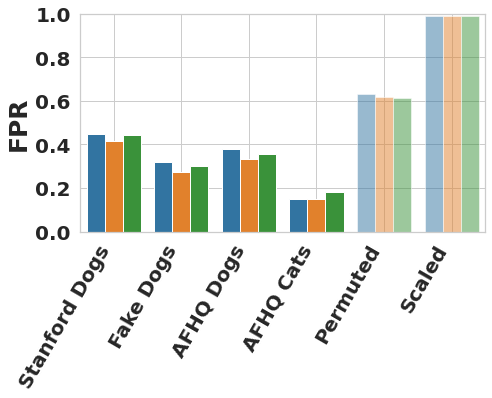

Label Smoothing


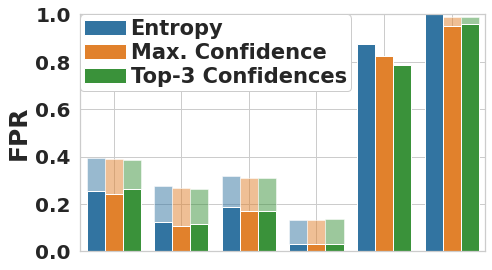

In [7]:
resnet50_uncalibrated_df = get_cleaned_dataframe(
    '../results/resnet50_stanford_dogs_attack_results.csv',
    is_cifar10=False,
    rows_to_keep=rows_to_keep_dogs
)
resnet50_uncalibrated_df = pd.melt(resnet50_uncalibrated_df, id_vars=['Dataset'], var_name='Attack', value_name='FPR')

print("LLLA")
resnet50_llla_calibrated_df = get_cleaned_dataframe(
    '../results/resnet50_stanford_dogs_LLLA_attack_results.csv',
    is_cifar10=False,
    rows_to_keep=rows_to_keep_dogs
)
resnet50_llla_calibrated_df = pd.melt(resnet50_llla_calibrated_df, id_vars=['Dataset'], var_name='Attack', value_name='FPR')

ax, fig = plot_dataframes(resnet50_uncalibrated_df, resnet50_llla_calibrated_df, show_y_label=True, show_x_axis=True, show_y_axis=True, show_legend=False)
fig = ax.get_figure()
plt.show()
fig.savefig('resnet50_LLLA_attack_results.pdf')

print("Label Smoothing")
resnet50_ls_calibrated_df = get_cleaned_dataframe(
    '../results/resnet50_stanford_dogs_LS_0.1_attack_results.csv',
    is_cifar10=False,
    rows_to_keep=rows_to_keep_dogs
)
resnet50_ls_calibrated_df = pd.melt(resnet50_ls_calibrated_df, id_vars=['Dataset'], var_name='Attack', value_name='FPR')

ax, fig = plot_dataframes(resnet50_uncalibrated_df, resnet50_ls_calibrated_df, show_y_label=True, show_x_axis=False, show_y_axis=True, show_legend=True)
fig = ax.get_figure()
plt.show()
fig.savefig('resnet50_LS_attack_results.pdf')